# To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

Data can be found <a href="http://bit.ly/w-data">here</a>

<b>Problem statement:</b> What will be predicted score if a student study for 9.25 hrs in a
day?

## What is Supervised Learning ?
Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs.

A Supervised learning algorithm can be written simply as <b>y = f(X) </b>

## What is regression ?

Supervised learning can be split into two subcategories: <i>Classification</i> and <i>Regression</i>.

Regression is a technique from statistics that is used to predict values of a desired target quantity when the target quantity is continuous. Regression predictive modeling is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y).

It is mainly used for prediction, forecasting, time series modeling, and determining the causal-effect relationship between variables.

### Importing necessary libraries

In [1]:
import pandas as pd #for data importing

import numpy as np #for mathematical operations

import matplotlib.pyplot as plt #for visualization
%matplotlib inline
import seaborn as sns #for visualization

from sklearn.model_selection import train_test_split
print("Importing Done.")

Importing Done.


### Loading data in dataframe

In [2]:
path="http://bit.ly/w-data"
df=pd.read_csv(path)
print("Importing Done.")

Importing Done.


## Understanding Data (Data Exploration)
Dataset: In this dataset ,there are only two variables:

    Hours : Number of hours a student is studing.

    Scores : percentage of marks.

In [3]:
#Print first 5 rows of data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Dimension of our data (rows, columns)
df.shape

(25, 2)

In [5]:
# Print all columns names
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
# data types of each column
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
# Checking for missing values or null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# Describing data in mathematical functions
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Correlation between variables of data
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


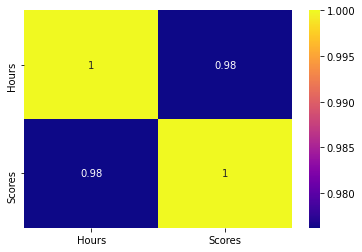

In [10]:
sns.heatmap(df.corr(),annot=True,cmap="plasma")

## Data Visualisation

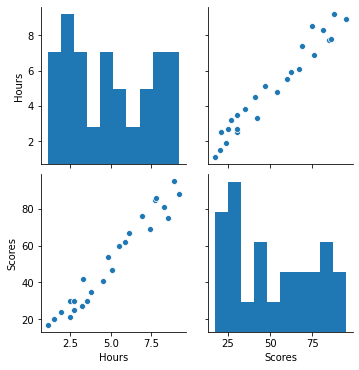

In [11]:
# Pairplot so we get both Histogram as well as Scatterplot
sns.pairplot(df)

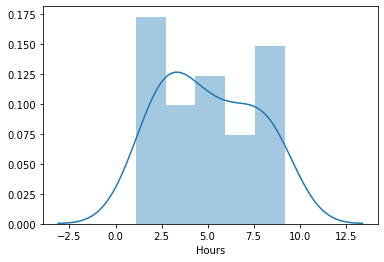

In [12]:
# Understanding the distribution curve of Hours
sns.distplot(df['Hours'],bins=5)

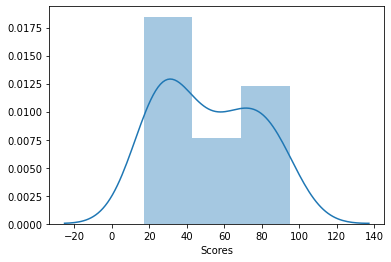

In [13]:
# Understanding the distribution curve of Hours
sns.distplot(df['Scores'])

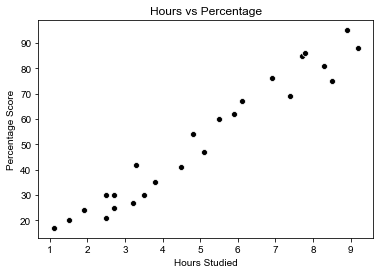

We can see that the Score value is linearly dependent on Hours


In [14]:
# Scatterplot 
sns.scatterplot(x='Hours',y="Scores",data=df,color='black')
sns.set(style="whitegrid")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()
print("We can see that the Score value is linearly dependent on Hours")

[]

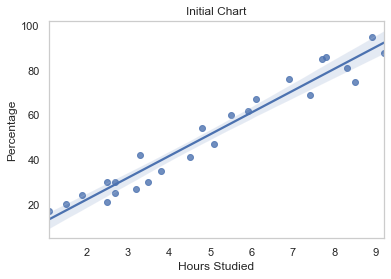

In [25]:
# Plotting the regression line to see the fitting
sns.regplot(x='Hours',y='Scores',data=df)
plt.title("Initial Chart")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.grid()
plt.plot()

## Data Preparation and Modelling

In [15]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

### Splitting Data in Training and Testing

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

### Training the algorithm 

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Plotting the regression line

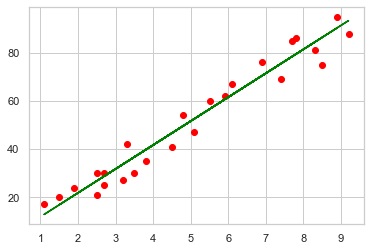

In [18]:
# Plotting the regression line
#y=mx+c
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line,color="green")
plt.show()

### Prediction

In [19]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [20]:
prediction=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
prediction

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [21]:
accuracy = regressor.score(X_test, y_test)
print("Accuracy: " + str(accuracy))

Accuracy: 0.9367661043365055


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997


### Problem statement solution (Conclusion)

In [23]:
hours = [[9.25]]
our_prediction = regressor.predict(hours)
print("If a student study for {} hours in a day then he will score {:.2f} percent.".format(hours[0][0],our_prediction[0]))

If a student study for 9.25 hours in a day then he will score 93.89 percent.
